**Лабораторная работа №4. Верификация человека по лицу**

Калинина Е.А., вариант 3 / 5

Детектор - Dlib

Распознаватель - DeepID

---

Сделать свою фотографию, выполнить детектирование лица на изображении, с помощью детектора из вашего варианта

In [3]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

image_path = 'face.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

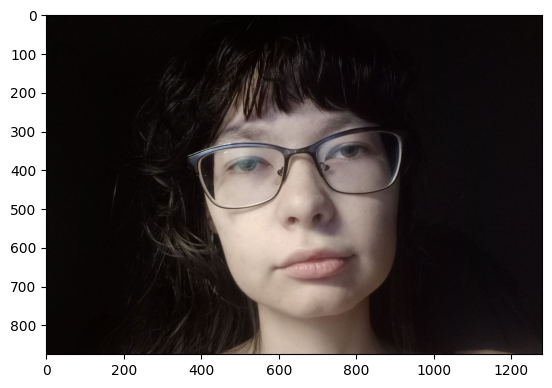

In [4]:
plt.imshow(image)

(np.float64(-0.5), np.float64(1279.5), np.float64(874.5), np.float64(-0.5))

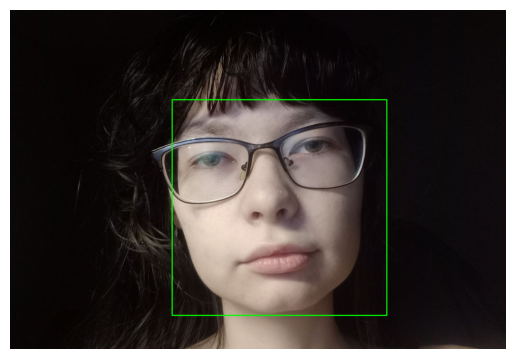

In [5]:
detector = dlib.get_frontal_face_detector()
face_rect = detector(image, 1)[0] #координаты лица
img_face = image.copy()

x1, y1, x2, y2 = face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()
cv2.rectangle(img_face, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img_face)
plt.axis('off')

Нормируем лицо для последующего извлечения признаков

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2
!pip install deepface

array([[[ 8,  4,  3],
        [ 9,  5,  4],
        [ 9,  5,  4],
        ...,
        [10,  6,  7],
        [10,  6,  7],
        [10,  6,  7]],

       [[ 9,  5,  4],
        [11,  7,  6],
        [ 9,  5,  4],
        ...,
        [10,  6,  7],
        [10,  6,  7],
        [ 9,  6,  7]],

       [[ 8,  4,  3],
        [10,  6,  5],
        [ 9,  5,  4],
        ...,
        [ 9,  5,  6],
        [10,  6,  7],
        [ 9,  6,  7]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [15, 10, 14],
        [16, 11, 15],
        [16, 11, 14]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [16, 11, 15],
        [16, 11, 15],
        [16, 12, 14]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [16, 11, 15],
        [17, 12, 16],
        [17, 12, 14]]], dtype=uint8)
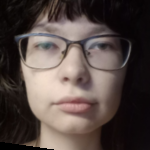

In [7]:
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
points = predictor(image, face_rect)
aligned_face = dlib.get_face_chip(image, points, size=150, padding=0.25)
aligned_face

Сформировать вектор признаков лица, с помощью модели-распознавателя

In [14]:
from deepface import DeepFace

embeddings = DeepFace.represent(
    img_path = aligned_face,
    model_name = "DeepID",
    detector_backend = "skip" #уже обнаружили лицо
)

face_vector = np.asarray(embeddings[0]["embedding"])
print('Размерность вектора:',len(face_vector))

25-12-08 15:45:49 - 🔗 deepid_keras_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/deepid_keras_weights.h5 to /root/.deepface/weights/deepid_keras_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/deepid_keras_weights.h5
To: /root/.deepface/weights/deepid_keras_weights.h5
100%|██████████| 1.61M/1.61M [00:00<00:00, 8.69MB/s]


Размерность вектора: 160


Определить устойчивость указанного в варианте задания модели и детектора к повороту и наклону головы

(np.float64(-0.5), np.float64(1279.5), np.float64(959.5), np.float64(-0.5))

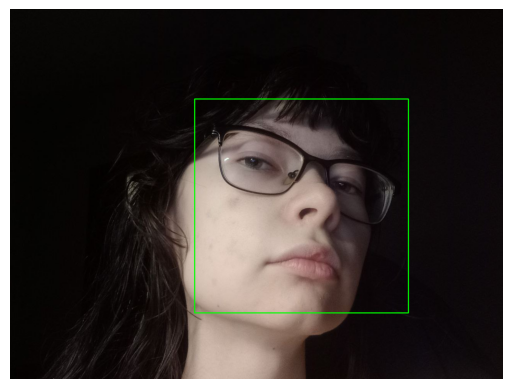

In [15]:
image2_path = 'face2.jpg'
image2 = cv2.imread(image2_path)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
face = detector(image2, 1)[0]
img_face = image2.copy()

x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
cv2.rectangle(img_face, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img_face)
plt.axis('off')

array([[[  9,   5,   4],
        [ 11,   7,   6],
        [  7,   3,   2],
        ...,
        [ 10,   6,   7],
        [ 11,   7,   8],
        [ 11,   7,   8]],

       [[  9,   5,   4],
        [  8,   4,   3],
        [  6,   2,   1],
        ...,
        [ 10,   6,   7],
        [ 10,   6,   7],
        [ 10,   6,   7]],

       [[  7,   3,   2],
        [  7,   3,   2],
        [  5,   1,   0],
        ...,
        [ 11,   7,   8],
        [ 10,   6,   7],
        [ 10,   6,   7]],

       ...,

       [[194, 172, 159],
        [191, 169, 156],
        [191, 169, 156],
        ...,
        [ 12,   7,  11],
        [ 13,   7,  11],
        [ 13,   7,  11]],

       [[198, 176, 163],
        [194, 172, 159],
        [193, 171, 158],
        ...,
        [ 14,   8,  12],
        [ 14,   8,  12],
        [ 14,   8,  12]],

       [[199, 177, 164],
        [197, 175, 162],
        [197, 175, 162],
        ...,
        [ 12,   6,  10],
        [ 12,   6,  10],
        [ 14,   8,  12]]], dtype=uint8)
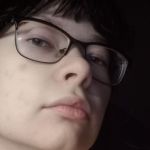

In [17]:
points = predictor(image2, face)
aligned_face2 = dlib.get_face_chip(image2, points, size=150, padding=0.25)
aligned_face2

In [18]:
from scipy.spatial.distance import pdist

embeddings2 = DeepFace.represent(
    img_path = aligned_face2,
    model_name = "DeepID",
    detector_backend = "skip"
)

face2_vector = np.asarray(embeddings2[0]["embedding"])

distance = pdist([face_vector, face2_vector], 'euclidean')[0]
print('Схожесть лиц:', 1 / (1 + distance))
print('Расстояние:', distance)

Схожесть лиц: 0.01038126042545557
Расстояние: 95.32741680845716


Для перестраховки проверим без ручного нормирования.

In [27]:
embeddings = DeepFace.represent(
    img_path = 'face.jpg',
    model_name = "DeepID",
    detector_backend = "dlib"
)

embeddings2 = DeepFace.represent(
    img_path = 'face2.jpg',
    model_name = "DeepID",
    detector_backend = "dlib"
)

face2_vector = np.asarray(embeddings2[0]["embedding"])

distance = pdist([face_vector, face2_vector], 'euclidean')[0]
print('Схожесть лиц:', 1 / (1 + distance))
print('Расстояние:', distance)

Схожесть лиц: 0.01035204779838363
Расстояние: 95.5992448524185


Дистанция большая, лица не были успешно распределены как одинаковые. Это может быть связано с малым размером DeepID. Проверим изображения на VGG-Face.

In [24]:
DeepFace.verify(img1_path="face.jpg",
                         img2_path="face2.jpg",
                         model_name='VGG-Face',
                         detector_backend = "dlib",
                         distance_metric="euclidean")

{'verified': True,
 'distance': 0.891482,
 'threshold': 1.17,
 'confidence': 72.64,
 'model': 'VGG-Face',
 'detector_backend': 'dlib',
 'similarity_metric': 'euclidean',
 'facial_areas': {'img1': {'x': 394,
   'y': 228,
   'w': 555,
   'h': 555,
   'left_eye': (780, 363),
   'right_eye': (532, 398)},
  'img2': {'x': 456,
   'y': 246,
   'w': 554,
   'h': 555,
   'left_eye': (841, 450),
   'right_eye': (654, 418)}},
 'time': 7.91}

В разы лучше. Расстояние сократилось в 107 раз.

Сравним с фотографией другого человека.

(np.float64(-0.5), np.float64(1169.5), np.float64(1287.5), np.float64(-0.5))

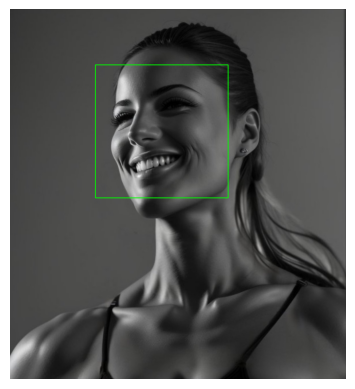

In [25]:
image3_path = 'chad.jpg'
image3 = cv2.imread(image3_path)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
face = detector(image3, 1)[0]
img_face = image3.copy()

x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
cv2.rectangle(img_face, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img_face)
plt.axis('off')

In [26]:
points = predictor(image3, face)
aligned_face3 = dlib.get_face_chip(image3, points, size=150, padding=0.25)

embeddings3 = DeepFace.represent(img_path = aligned_face3, model_name = "DeepID", detector_backend = "skip")
face3_vector = np.asarray(embeddings3[0]["embedding"])

distance = pdist([face_vector, face3_vector], 'euclidean')[0]
print('Схожесть лиц:', 1 / (1 + distance))
print('Расстояние:', distance)

Схожесть лиц: 0.006046112720813891
Расстояние: 164.39552703962588


Расстояние стало больше в ~1.73 раз (164 vs 95). Можно уверенно сказать, что лица разные.